# <font color='pink'>Проектирование признаков</font>
(Feature Engineering)

Этот процесс также называют конструированием признаков или разработкой признаков. Все эти термины описывают процесс создания признаков, которые нужны для обучения модели.

Вы уже знакомы с методами создания столбцов в pandas из модуля PYTHON-11. Базовые приемы работы с данными в Pandas. Юнит 2. Базовые операции со столбцами DataFrame. Советуем повторить этот материал.

Новые признаки могут быть сконструированы двумя способами: 

1) с помощью внешних источников данных;
2) из существующего набора данных.

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

1) разбор категорий; 
2) разбор даты и времени;
3) разбор числовых признаков;
4) разбор текста.

<font color='yellow'>РАЗБОР ДАТЫ И ВРЕМЕНИ</font>

в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать. </br>
Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

<font color='yellow'>РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН</font>

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели.

<font color='yellow'>РАЗБОР ТЕКСТА</font>

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки. В названии вина вы можете заметить указание года произведения вина. </br>Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак. Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

<font color='3499ff'>Регулярные выражения</font> (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья [Python RegEx: практическое применение регулярок](https://tproger.ru/translations/regular-expression-python/).

Например, с помощью такого регулярного выражения <font color='green'>[^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+</font> можно найти любой email в тексте.
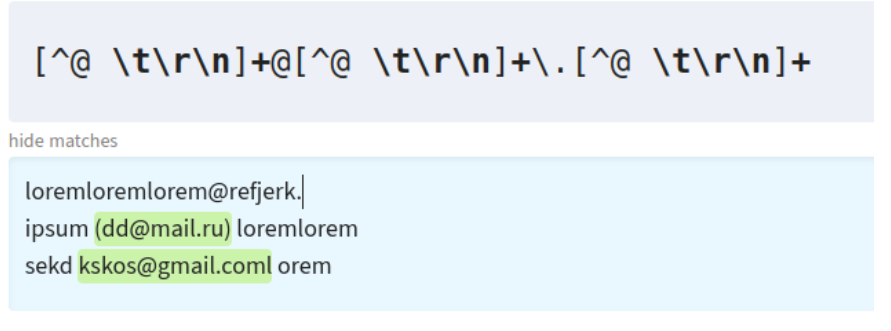

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом <font color='green'>str.findall()</font>. Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.

<font color='yellow'>РАЗБОР КАТЕГОРИЙ</font>

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

```
    data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
```